# Music Genre Classification

#### GTZAN Dataset

### Importing Libraries

In [12]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

### Loading Dataset

In [3]:
# Importing Dataset using Pandas.
data = pd.read_csv("audio_data.csv")
data.shape  

(1000, 30)

In [102]:
data.head()

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783624,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


## Data Preprocessing

In [103]:
# Counting Number of Attrition.
dictribution = data["class_name"].value_counts()
dictribution

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: class_name, dtype: int64

In [104]:
# Checking Null values in all features.
data.isnull().sum()

class_name            0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [105]:
# Checking Data Types of every column.
data.dtypes

class_name             object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object

In [106]:
data['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [4]:
# These two lines of code are used to convert the class_name column in a Pandas DataFrame to a categorical variable and then convert it to numerical codes.
data['class_name'] = data['class_name'].astype('category')
data['class_label'] = data['class_name'].cat.codes

The cat.codes function returns a numerical code for each unique category in the categorical variable. The numerical codes are assigned based on the order in which the categories appear in the DataFrame, with the first category getting a code of 0, the second category getting a code of 1, and so on.

In [108]:
data['class_label']

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: class_label, Length: 1000, dtype: int8

In [109]:
class_lookup = dict(zip(data.class_label.unique(), data.class_name.unique()))
class_lookup

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [5]:
# Dropping Unnecessary Column.
data.drop('class_name',axis=1,inplace=True)
data.drop('label',axis=1,inplace=True)
data.drop('beats',axis=1,inplace=True)

In [111]:
# Checking Data types of column. All columns must be in numbers.
data.dtypes

tempo                 float64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
class_label              int8
dtype: object

## Splitting Dataset into Test and Train

In [6]:
X = data.loc[:, data.columns != 'class_label']     # All columns except target variable.
y = data[['class_label']]                          # Target Variable.

In [7]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(700, 27)
(700, 1)
(300, 27)
(300, 1)


### Scaling the data

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(trainX)
trainX_scaled = scaling.transform(trainX)
testX_scaled = scaling.transform(testX)

In [115]:
trainX.head()

,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
90,83.354335,0.269929,0.079673,1537.657183,2054.779113,3495.653862,0.056132,-252.533986,104.927485,15.353578,...,-1.953308,1.960557,-0.881435,7.778604,2.390255,1.774140,1.339317,3.630699,4.910860,-2.651944
305,95.703125,0.373596,0.188945,3132.641648,3007.907247,6863.758496,0.130977,-41.303284,62.797761,7.327263,...,-2.688466,-7.218402,-3.246054,-1.924748,0.521216,-3.185653,-5.548058,-9.165678,-10.674253,-5.973118
126,129.199219,0.346798,0.115125,1878.644574,1964.912008,3633.986359,0.111613,-85.243462,118.428898,-31.474636,...,-4.433377,-1.403674,-4.247367,-4.168933,-3.982021,0.275397,-3.393380,1.694451,-3.685527,-3.439862
963,107.666016,0.346682,0.065505,2632.695048,2550.454193,5310.709554,0.132433,-156.208457,75.611329,-16.509524,...,-4.096210,-2.213438,-4.643326,-5.409220,-4.687138,-7.082285,-3.890626,1.386993,-2.007640,-4.728466
163,135.999178,0.246935,0.041608,1558.813953,1578.563682,2922.065664,0.092215,-297.219748,130.280589,-30.588890,...,-5.373448,4.469510,1.731519,1.888137,-1.310469,1.090912,-0.989502,-1.464830,0.635971,1.159916


In [9]:
trainX_scaled = pd.DataFrame(trainX_scaled, columns= trainX.columns)
testX_scaled = pd.DataFrame(testX_scaled, columns= testX.columns)

In [117]:
trainX_scaled.head()

,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.157258,0.199571,0.189433,0.221138,0.442944,0.323919,0.121273,0.504176,0.553531,0.660947,...,0.676269,0.457377,0.722300,0.660328,0.724796,0.596844,0.646537,0.570514,0.682340,0.489553
1,0.236111,0.410365,0.467667,0.649984,0.807905,0.763452,0.421999,0.859724,0.334470,0.589726,...,0.657220,0.221066,0.658238,0.342893,0.656844,0.425863,0.406707,0.102724,0.175923,0.395480
2,0.450000,0.355874,0.279703,0.312820,0.408533,0.341972,0.344196,0.785763,0.623734,0.245421,...,0.612006,0.370765,0.631110,0.269476,0.493121,0.545177,0.481736,0.499732,0.403012,0.467235
3,0.312500,0.355639,0.153357,0.515562,0.632742,0.560782,0.427851,0.666313,0.401096,0.378213,...,0.620743,0.349918,0.620383,0.228901,0.467486,0.291532,0.464421,0.488493,0.457533,0.430735
4,0.493421,0.152815,0.092511,0.226827,0.260596,0.249067,0.266256,0.428960,0.685360,0.253281,...,0.587648,0.521969,0.793091,0.467627,0.590250,0.573291,0.565443,0.384240,0.543433,0.597525


In [17]:
features = trainX_scaled.columns
print(features)

Index(['tempo', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


## Models Implementation

### XGB Classifier

In [119]:
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
xgb.fit(trainX_scaled,trainy.values.ravel())
y_pred = xgb.predict(testX_scaled)

Confusion Matrix:
[[14  0  4  1  1  2  0  0  2  0]
 [ 0 27  0  0  0  3  0  0  2  0]
 [ 2  1 18  0  0  3  0  3  4  3]
 [ 0  0  1 16  4  0  0  2  1  6]
 [ 0  0  0  2 19  0  2  0  5  1]
 [ 1  2  1  0  0 22  0  0  0  3]
 [ 2  0  0  1  1  1 24  0  0  1]
 [ 0  0  1  1  1  3  0 16  4  0]
 [ 1  0  3  0  6  2  3  2 20  0]
 [ 3  0  2  4  0  2  1  0  1 16]]
------------------------------------
Accuracy of XGBOOST: 64.0 %
------------------------------------


Text(0.5, 1.0, 'Contribution of features in Model Performance')

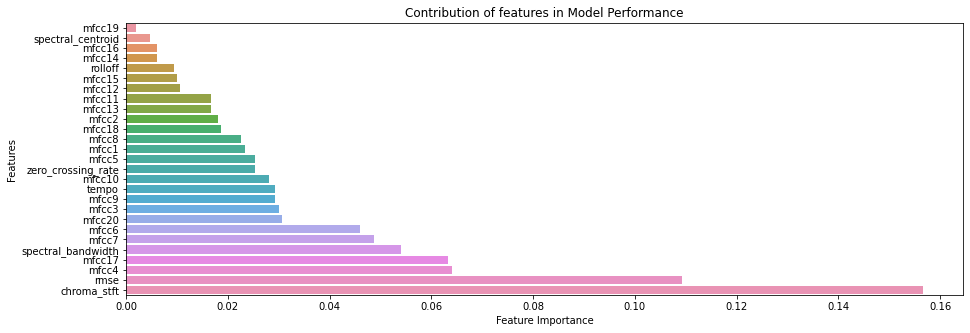

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')



accuracy = xgb.score(testX_scaled, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')

perm_importance = permutation_importance(xgb, testX_scaled, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Random Forest Classifier

In [121]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
rf.fit(trainX_scaled,trainy.values.ravel())
y_pred = rf.predict(testX_scaled)

Confusion Matrix:
[[15  0  1  1  1  3  0  0  2  1]
 [ 0 29  0  0  0  2  0  0  1  0]
 [ 2  0 17  3  1  6  0  1  2  2]
 [ 0  0  0 12  6  0  2  5  1  4]
 [ 1  0  0  1 18  0  2  2  4  1]
 [ 0  0  3  0  1 21  0  3  0  1]
 [ 2  0  0  1  1  0 26  0  0  0]
 [ 0  0  0  2  0  4  0 16  3  1]
 [ 1  1  1  1  4  0  1  2 25  1]
 [ 5  0  4  8  0  2  1  0  0  9]]
------------------------------------
Accuracy of Random Forest: 62.66666666666667 %
------------------------------------


Text(0.5, 1.0, 'Contribution of features in Model Performance')

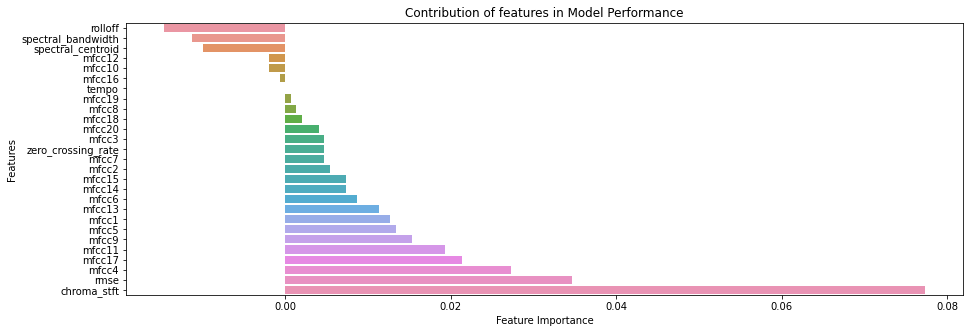

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')



accuracy = rf.score(testX_scaled, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

perm_importance = permutation_importance(rf, testX_scaled, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Gradient Boosting Classifier

In [123]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
gb.fit(trainX_scaled,trainy.values.ravel())
y_pred = gb.predict(testX_scaled)

Confusion Matrix:
[[13  0  3  1  1  3  0  0  3  0]
 [ 0 26  0  0  0  3  0  0  2  1]
 [ 2  0 20  2  0  5  0  1  3  1]
 [ 0  0  1 15  4  0  1  3  1  5]
 [ 1  0  0  2 16  1  3  0  3  3]
 [ 0  1  1  0  0 23  0  0  0  4]
 [ 2  1  0  1  1  2 21  0  0  2]
 [ 0  0  2  0  3  4  0 13  1  3]
 [ 3  1  4  0  5  1  1  3 15  4]
 [ 4  0  5  5  1  2  1  0  2  9]]
------------------------------------
Accuracy of Gradient Boosting: 56.99999999999999 %
------------------------------------


Text(0.5, 1.0, 'Contribution of features in Model Performance')

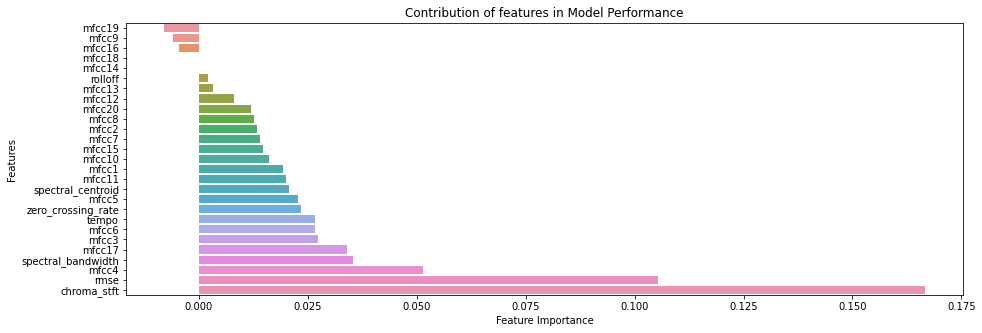

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')



accuracy = gb.score(testX_scaled, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')

perm_importance = permutation_importance(gb, testX_scaled, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

## Feature Selection using Random Forest.

In [125]:
X = data.loc[:, data.columns != 'class_label']     # All columns except target variable.
y = data[['class_label']]                          # Target Variable.

In [126]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

In [127]:
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(trainX, trainy)

RandomForestClassifier(n_estimators=50, random_state=100)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

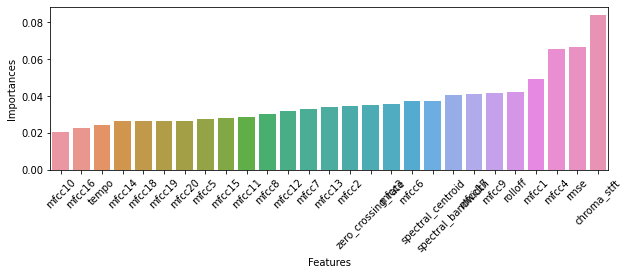

In [128]:
import seaborn as sns
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": trainX.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [129]:
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=12, step=1)    # Selecting 9 imporatant Features.
X_train_rfe_tree = sel_rfe_tree.fit_transform(trainX, trainy)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[False  True  True  True  True  True False  True False  True  True False
  True False False  True False False  True False False False False  True
 False False False]
[13  1  1  1  1  1  3  1  5  1  1 11  1  6  7  1 14  2  1  4 15 10 16  1
  8 12  9]


In [130]:
# These are the important features after RFE.
selected_cols = [column for column in trainX.columns if column in trainX.columns[sel_rfe_tree.get_support()]]
selected_cols

['chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'mfcc1',
 'mfcc3',
 'mfcc4',
 'mfcc6',
 'mfcc9',
 'mfcc12',
 'mfcc17']

Splitting Dataset after feature selection

In [131]:
#Adding all imporatant features after RFE in X variable.
X = data[['chroma_stft', 'rmse', 'spectral_bandwidth', 'rolloff', 'mfcc1', 'mfcc3', 'mfcc4', 'mfcc9', 'mfcc17', 'mfcc12','mfcc6','spectral_centroid']]
y = data[['class_label']]              # Target Variable.

In [132]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(700, 12)
(700, 1)
(300, 12)
(300, 1)


### XGBClassifier (After Feature Selection)

In [133]:
xgb = XGBClassifier(max_depth = 8, learning_rate = 0.1)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')

Confusion Matrix:
[[14  0  5  0  0  4  1  0  0  0]
 [ 0 28  1  0  0  2  0  0  1  0]
 [ 2  1 16  1  0  8  0  1  3  2]
 [ 0  0  1 11  5  0  0  2  2  9]
 [ 1  0  0  3 16  1  3  1  4  0]
 [ 1  2  2  0  0 23  0  0  0  1]
 [ 2  0  1  0  1  2 24  0  0  0]
 [ 0  0  1  0  3  1  0 19  2  0]
 [ 1  0  4  2  4  1  2  1 16  6]
 [ 5  0  3  3  1  3  0  2  1 11]]
------------------------------------
Accuracy of XGBOOST: 59.333333333333336 %
------------------------------------


#### Random Forest Classifier (After Feature Selection)

In [135]:
rf = RandomForestClassifier(max_depth=15,n_estimators = 1000)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[15  0  0  1  0  3  1  0  2  2]
 [ 0 27  2  0  0  2  0  0  1  0]
 [ 3  1 17  4  0  5  0  3  1  0]
 [ 0  0  0 13  6  0  0  3  2  6]
 [ 1  0  0  0 17  0  2  4  3  2]
 [ 2  0  1  1  1 21  0  3  0  0]
 [ 2  0  0  1  1  1 25  0  0  0]
 [ 0  0  0  1  1  4  0 17  2  1]
 [ 0  0  1  2  5  3  1  1 23  1]
 [ 6  0  4  5  0  2  0  1  1 10]]
------------------------------------
Accuracy of Random Forest: 61.66666666666667 %
------------------------------------


Text(0.5, 1.0, 'Contribution of features in Model Performance')

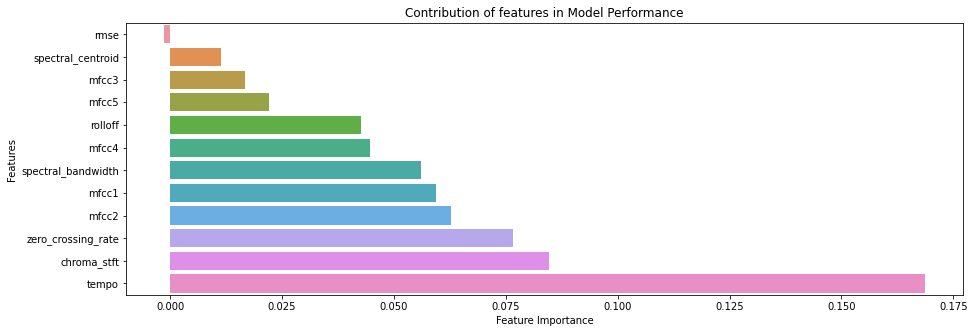

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')



accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

perm_importance = permutation_importance(rf, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

## Hyper Parameter Tuning using Grid Search.

In [137]:
gb_cv = RandomForestClassifier()
param_grid = {
     'max_depth': [2, 5, 10, 20, 30, 40, 50,60,70,80.90,100],
     'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450,500,550,600,650,700,750,800,900,950,1000] 
}
grid_search = GridSearchCV(estimator = gb_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

### Random Forest Classifier (with Tuned Parameter)

In [138]:
rf = RandomForestClassifier(max_depth=60 , n_estimators= 350)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

In [143]:
trainX.columns

Index(['chroma_stft', 'rmse', 'spectral_bandwidth', 'rolloff', 'mfcc1',
       'mfcc3', 'mfcc4', 'mfcc9', 'mfcc17', 'mfcc12', 'mfcc6',
       'spectral_centroid'],
      dtype='object')

In [144]:
features = trainX.columns
print(features)

Index(['chroma_stft', 'rmse', 'spectral_bandwidth', 'rolloff', 'mfcc1',
       'mfcc3', 'mfcc4', 'mfcc9', 'mfcc17', 'mfcc12', 'mfcc6',
       'spectral_centroid'],
      dtype='object')


Confusion Matrix:
[[15  0  1  1  0  3  1  0  2  1]
 [ 1 27  1  0  0  2  0  0  1  0]
 [ 3  1 15  4  0  6  0  2  2  1]
 [ 0  0  0 14  6  0  0  2  2  6]
 [ 1  0  0  1 18  0  2  5  1  1]
 [ 2  0  2  2  1 20  0  2  0  0]
 [ 1  0  0  1  0  1 26  0  0  1]
 [ 0  0  1  1  0  4  0 17  3  0]
 [ 0  0  1  2  5  3  2  1 22  1]
 [ 5  0  4  5  0  2  0  1  1 11]]
------------------------------------
Accuracy of Random Forest: 61.66666666666667 %
------------------------------------


Text(0.5, 1.0, 'Contribution of features in Model Performance')

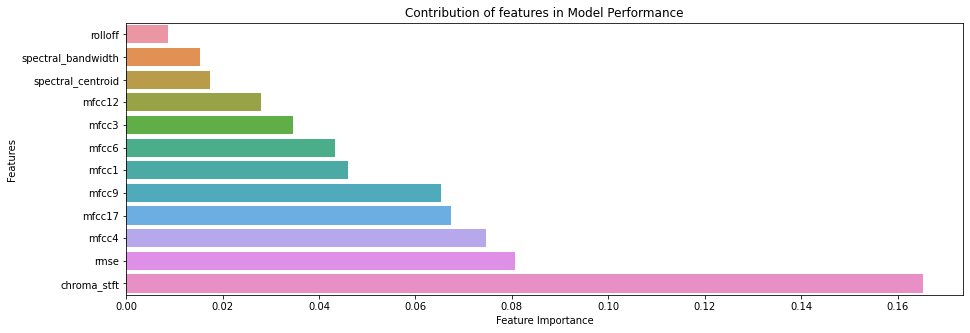

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')



accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

perm_importance = permutation_importance(rf, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Ensemble Model : Voting Classifier

In [140]:
from sklearn.ensemble import VotingClassifier
r0 = RandomForestClassifier(max_depth=60 , n_estimators= 350)
r1 = XGBClassifier(max_depth = 12, learning_rate = 0.01)
r2 = XGBClassifier(learning_rate = 0.82, max_depth = 2)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')



accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')

Confusion Matrix:
[[15  0  3  1  1  3  0  0  0  1]
 [ 2 25  1  0  0  3  0  0  1  0]
 [ 3  1 18  0  1  6  0  1  2  2]
 [ 0  0  0 14  6  0  0  2  3  5]
 [ 1  1  0  3 16  1  3  1  3  0]
 [ 1  2  1  0  0 23  0  1  0  1]
 [ 1  0  1  0  1  2 25  0  0  0]
 [ 0  0  1  1  3  2  0 16  1  2]
 [ 1  0  2  1  5  2  2  3 18  3]
 [ 4  0  4  4  0  2  0  2  1 12]]
------------------------------------
Accuracy of Voting Classifier: 60.66666666666667 %
------------------------------------


### Saving Random Forest Model

In [142]:
import pickle
pickle_out = open("rf.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()